Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All).

Note that this Pre-class Work is estimated to take **44 minutes**.

Make sure you fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE", as well as your name and collaborators below:

In [ ]:
NAME = "Jeong woo Park"
COLLABORATORS = ""

---

# CS110 Pre-class Work - Randomized quicksort

## Part A. Median-of-3 partitioning quicksort 

## Question 1 [time estimate: 10 minutes]

Read through the following Python code. What does each function (i.e., median, qsort, randomized_qsort, test_qsort) do? Comment in details each function. 


In [2]:
import timeit
import random

eps = 1e-16
N = 10000
locations = [0.0, 0.5, 1.0 - eps]

#Median function : from 3 input, find the median
def median(x1, x2, x3): 
    if (x1 < x2 < x3) or (x3 < x2 < x1):
        return x2
    elif (x1 < x3 < x2) or (x2 < x3 < x1):
        return x3
    else:
        return x1
    
#qsort function: deterministic quicksort function by having the median value of first, last, middle value of the list as a partition
def qsort(lst):
    indices = [(0, len(lst))]

    #without having a recursive form, this function uses while loop to sort
    while indices:
        (frm, to) = indices.pop()
        if frm == to:
            continue

        # Find the partition:
        N = to - frm
        inds = [frm + int(N * n) for n in locations]
        values = [lst[ind] for ind in inds]
        partition = median(*values)

        # Split into lists:
        lower = [a for a in lst[frm:to] if a < partition]
        upper = [a for a in lst[frm:to] if a > partition]
        counts = sum([1 for a in lst[frm:to] if a == partition])

        ind1 = frm + len(lower)
        ind2 = ind1 + counts

        # Push back into correct place:
        lst[frm:ind1] = lower
        lst[ind1:ind2] = [partition] * counts
        lst[ind2:to] = upper

        # Enqueue other locations
        indices.append((frm, ind1))
        indices.append((ind2, to))
    return lst

#randomized quicksort function: this function uses above quicksort function after making a random list of size N(declared as 10000)
def randomized_quicksort():
    lst = [i for i in range(N)]
    random.shuffle(lst)
    return qsort(lst)

#test quicksort function: check if it is well sorted
def test_quicksort():
    lst = randomized_quicksort()
    assert (lst == [i for i in range(N)])


# Is our algorithm correct
test_quicksort()

# How fast is our algorithm
print(timeit.timeit(randomized_quicksort, number=1))

0.054490100000009534


## Question 2 [time estimate: 3 minutes]

What are the main differences between the `randomized_quicksort` in the code and $RANDOMIZED-QUICKSORT$ in Cormen et al., besides that the partition of `randomized_quicksort` uses a median of 3 as a pivot?

There are two ways of making the partition element random. 1. choose a random element in the first place. 2. make the list randomly shuffled to make the element that comes to the chosen(stable place) for being a partition, from the last pcw, by shuffling the whole list the last element of the list will also be 'random' so, having the same effect as choosing the element randomly. 

Main difference is that the given qsort function is still deterministic. What I mean is that book is using way 1 stated above, and this code uses way 2. The randomness is only applied when shuffling the generated(sorted) list of size N. So, basically, the difference is that this function does not choose the pivot randomly (as the Cormen et al stated in chpt 7.3). But it is made 'random' by mixing the list elements. So, instead of choosing a random element index, we are choosing a random number that is a median of 3 values of 3 set places(front, last, middle).

## Question 3 [time estimate: 10 minutes]

What is the time complexity of this `randomized_qsort`? Time the algorithm on lists of various lengths, each list being a list of the first $n$ consecutive positive integers. Produce a graph with list lengths on the x axis and running time on the y axis. As always, don’t forget to time the algorithm several times for each list’s length and then average the results. 

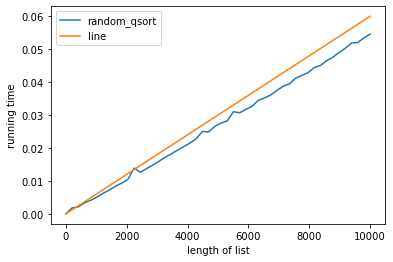

In [13]:
import matplotlib.pyplot as plt
import numpy as np

x = np.linspace(1,10000)
plt.xlabel("length of list")
plt.ylabel("running time")

y = []
for i in x:
    N = int(i)
    a = timeit.timeit(randomized_quicksort, number = 1)
    b = timeit.timeit(randomized_quicksort, number = 1)
    c = timeit.timeit(randomized_quicksort, number = 1)
    y.append((a+b+c)/3)

plt.plot(x, y, label = "random_qsort")
plt.plot(x,0.000006*x, label = "line")
plt.legend()

plt.show()

The graph looks pretty linear. However, according to the reading, not-the-worst-case scenario of quicksort should have time complexity of O(nlogn). I think what ever random shuffle the list makes, the function is likely to choose good enough value for a partition to (almost) evenly split the list and sort through.

## Question 4.

### Question 4a [time estimate: 7 minutes]

Change the `qsort()` function in a way that you **don’t** separate the items that are equal to the partition. 


In [47]:
eps = 1e-16
N = 10000
locations = [0.0, 0.5, 1.0 - eps]

#Median function : from 3 input, find the median
def median(x1, x2, x3): 
    if (x1 < x2 < x3) or (x3 < x2 < x1):
        return x2
    elif (x1 < x3 < x2) or (x2 < x3 < x1):
        return x3
    else:
        return x1
    

def qsort(lst):
    indices = [(0, len(lst))]

    #without having a recursive form, this function uses while loop to sort
    while indices:
        (frm, to) = indices.pop()
        if frm == to:
            continue

        # Find the partition:
        N = to - frm
        inds = [frm + int(N * n) for n in locations]
        values = [lst[ind] for ind in inds]
        partition = median(*values)

        # Split into lists:
        lower = [a for a in lst[frm:to] if a < partition]
        upper = [a for a in lst[frm:to] if a > partition]
        
        ind1 = frm + len(lower)

        # Push back into correct place:
        lst[frm:ind1] = lower
        lst[ind1] = partition
        lst[ind1+1:to] = upper

        # Enqueue other locations
        indices.append((frm, ind1))
        indices.append((ind1+1, to))
        
    return lst


In [43]:
assert(qsort([4,2,1])==[1,2,4])
assert(qsort([0])==[0])

### Question 4b [time estimate: 3 minutes]

Now time the algorithm on the same inputs you have used in question 3, adding one more line in the previous graph you have produced. 

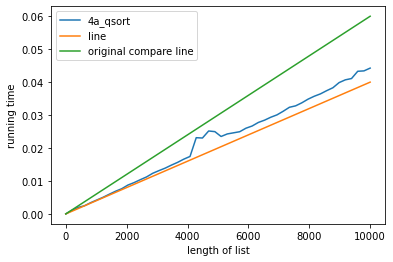

In [48]:
import matplotlib.pyplot as plt
import numpy as np

x = np.linspace(1,10000)
plt.xlabel("length of list")
plt.ylabel("running time")

y = []
for i in x:
    N = int(i)
    a = timeit.timeit(randomized_quicksort, number = 1)
    b = timeit.timeit(randomized_quicksort, number = 1)
    c = timeit.timeit(randomized_quicksort, number = 1)
    y.append((a+b+c)/3)

plt.plot(x, y, label = "4a_qsort")
plt.plot(x,0.000004*x, label = "line")
plt.plot(x, 0.000006*x, label = "original compare line")
plt.legend()

plt.show()

## Question 5.

### Question 5a [time estimate: 3 minutes]

Remove the median-of-3 partitioning, and just use the first element in the array. 

In [49]:
def qsort(lst):
    indices = [(0, len(lst))]

    #without having a recursive form, this function uses while loop to sort
    while indices:
        (frm, to) = indices.pop()
        if frm == to:
            continue

        partition = lst[0]

        # Split into lists:
        lower = [a for a in lst[frm:to] if a < partition]
        upper = [a for a in lst[frm:to] if a > partition]

        ind1 = frm + len(lower)

        # Push back into correct place:
        lst[frm:ind1] = lower
        lst[ind1] = partition
        lst[ind1+1:to] = upper

        # Enqueue other locations
        indices.append((frm, ind1))
        indices.append((ind1+1, to))
    return lst


In [45]:
assert(qsort([4,2,1])==[1,2,4])
assert(qsort([0])==[0])

### Question 5b [time estimate: 3 minutes]

Does this change the running time of your algorithm? Justify your response with a graph. 



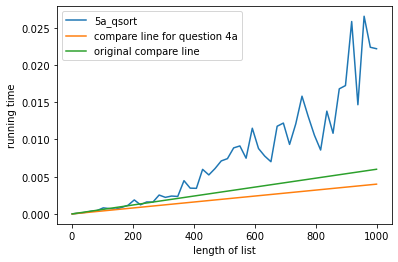

In [52]:
import matplotlib.pyplot as plt
import numpy as np

x = np.linspace(1,1000)
plt.xlabel("length of list")
plt.ylabel("running time")

y = []
for i in x:
    N = int(i)
    a = timeit.timeit(randomized_quicksort, number = 1)
    b = timeit.timeit(randomized_quicksort, number = 1)
    c = timeit.timeit(randomized_quicksort, number = 1)
    y.append((a+b+c)/3)

plt.plot(x, y, label = "5a_qsort")
plt.plot(x,0.000004*x, label = "compare line for question 4a")
plt.plot(x, 0.000006*x, label = "original compare line")
plt.legend()

plt.show()

## Part B. Recursive quicksort [time estimate: 5 minutes]

One main difference between the quicksort algorithms in Cormen et al. and the implementation in the code above is that quick sort (in the code in this notebook) is not recursive, while $QUICKSORT$ in Cormen et al. is. Given the limitation of Python so that it can only make 500 recursive calls, estimate the maximum size of the list that can be sorted by Python if a recursive quicksort is to be used. Explicitly state all assumptions you make in getting to an answer.


To have the maximum size of the list, I need to assume that the quicksort function splits the list into two sublists that are same(can have 1 difference depending on the len(list) = N is even or odd) so that the function does not have to iterate a lot of times. This is because the more the partition becomes close to the median of the whole list(or a sublist), the depth of the level becomes less deeper (least level = log based 2 N, most level = N).
So, 500 recursive calls can be made which is used to 'split' the function from the previous PCW. Here, I am assuming that recursive call is only used to split the function, thus the maximum depth of the recursive form can be 500. It means that log(base = 2) x = 500. The x will be 3,273,390,... = about 3.273 * 10^150.
As x meant to be the size of the list(input), the maximum size of the list in recursive form is about 3.3 * 10^150 .